In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# for geographical info
# pip install descartes
# conda install geopandas
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
# for train/validation split
from sklearn.model_selection import train_test_split
# for linear regression
from sklearn import linear_model
# for knn
from sklearn.neighbors import KNeighborsRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Part 1: Data Exploration
* First let's get a sense of our data

    - no missing values for percentiles
    - most of the time records are zeros
    - the data consists of 857409 rows and 31 columns
    - there are 2539 unique intersections in our data

In [28]:
print("the data consists of {} rows and {} columns".format(train.shape[0], train.shape[1]))

the data consists of 857409 rows and 31 columns


In [29]:
print("there are {} unique intersections in our data".format(len(train['IntersectionId'].unique())))

there are 2539 unique intersections in our data


In [3]:
print(train.columns)

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City'],
      dtype='object')


In [4]:
train.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.574090e+05,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,...,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000
mean,2.349039e+06,836.330832,39.657555,-77.900396,12.427463,0.277485,9.104448,1.731272,5.356027,7.681874,...,3.126932,9.051338,12.613628,18.801785,34.037097,6.564450,19.872987,28.255852,43.273503,81.922639
std,2.475128e+05,644.200553,2.920760,5.975814,6.062097,0.447758,1.993233,7.080017,12.861420,15.553418,...,11.631092,20.120829,23.847749,29.399634,40.619387,28.003261,56.564229,71.720090,96.933561,152.682760
min,1.920335e+06,0.000000,33.649970,-87.836750,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.134687e+06,306.000000,39.937600,-84.387710,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.349039e+06,685.000000,39.985810,-75.173270,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,60.400000
75%,2.563391e+06,1254.000000,41.918580,-75.080190,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,52.900000,64.100000,85.600000
max,2.777743e+06,2875.000000,42.381780,-71.023520,23.000000,1.000000,12.000000,273.000000,318.000000,343.000000,...,334.000000,347.000000,355.000000,358.000000,359.000000,1902.700000,3099.500000,3099.500000,3581.600000,4064.300000


In [82]:
# check for missing values
print(train.isna().sum(axis=0))
print(test.isna().sum(axis=0))

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
count_entry_streets           0
count_exit_streets            0
geo_cluster                   0
dtype: i

## How many roads are linked to one intersection?
* take into consideration that some roads might be one way
* so count number of entry and exit separately
* in this part, we discovered that some entry street and exit street names are missing, so we fill them with "Unknown"
##############################################################################################

things possible to try:
* try using the closest street(s) based on geo location prediction for unknown street names?
* count the number of unique "street + direction" for each road instead of unique "street"

In [5]:
roads=train.groupby("IntersectionId")[["EntryStreetName", 'ExitStreetName']].aggregate(lambda x: len(x.unique()))
roads.columns = ["count_entry_streets", "count_exit_streets"]
train=train.merge(roads, left_on = "IntersectionId", right_index = True, how = "left")

In [6]:
train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'count_entry_streets', 'count_exit_streets'],
      dtype='object')

In [24]:
print(train["count_entry_streets"].unique())
print(train["count_exit_streets"].unique())

[ 8  5  9  4  7  6 10  3  2  1 11]
[ 7  5  8  9  6  4 10 11  3  2  1]


so all our intersections have at least 1 entry and at least 1 exit, and the most entry/exit roads they can have is 11!

Intuitively, I think one intersection should have more than just 1 entry street and 1 exit street, let's check is this the case?

In [27]:
print(len(train[(train["count_entry_streets"] == 1) & (train["count_exit_streets"] == 1)].IntersectionId.unique()))

414


No! There are 414 intersections that have 1 count of entry street and 1 exit street, let's take a closer look on them

In [30]:
oneway = train[(train["count_entry_streets"] == 1) & (train["count_exit_streets"] == 1)]
oneway.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,count_entry_streets,count_exit_streets,geo_cluster
90482,2010817,314,33.65013,-84.39211,NaN,NaN,SW,SE,1,0,...,29,0.0,0.0,0.0,0.0,15.7,Atlanta,1,1,1
90483,2010818,314,33.65013,-84.39211,NaN,NaN,N,NE,8,0,...,0,0.0,0.0,0.0,0.0,0.0,Atlanta,1,1,1
90484,2010819,314,33.65013,-84.39211,NaN,NaN,N,NE,10,0,...,0,0.0,0.0,0.0,0.0,0.0,Atlanta,1,1,1
90485,2010820,314,33.65013,-84.39211,NaN,NaN,N,NE,17,0,...,0,0.0,0.0,0.0,0.0,0.0,Atlanta,1,1,1
90486,2010821,314,33.65013,-84.39211,NaN,NaN,SW,S,18,1,...,47,12.7,12.9,12.9,14.2,98.7,Atlanta,1,1,1


remember there are missing values for Entry and Exit street! 

For now fill them with Unknown

In [61]:
train.loc[:,"ExitStreetName"]= train.loc[:,"ExitStreetName"].fillna("Unknown")
train.loc[:,"EntryStreetName"] = train.loc[:,"EntryStreetName"].fillna("Unknown")
oneway = train[(train["count_entry_streets"] == 1) & (train["count_exit_streets"] == 1)]

In [78]:
print("there are {} data in total that have only 1 entry and exit street".format(oneway.shape[0]))
print("that includes {} unique intersections in total".format(len(oneway["IntersectionId"].unique())))
print("there are {} data have same entry and exit street name (including unknown)".format(np.sum(oneway["EntryStreetName"] == oneway["ExitStreetName"])))
print("that includes {} unique intersections".format(len(oneway[oneway["EntryStreetName"] == oneway["ExitStreetName"]]["IntersectionId"].unique())))

there are 21585 data in total that have only 1 entry and exit street
that includes 414 unique intersections in total
there are 21575 data have same entry and exit street name (including unknown)
that includes 412 unique intersections


looking at the 2 other intersections:


In [79]:
oneway[oneway["EntryStreetName"] != oneway["ExitStreetName"]].head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,count_entry_streets,count_exit_streets,geo_cluster
434342,2354677,2077,41.89190,-87.61400,Lower Lake Shore Drive,East Grand Avenue,N,N,15,0,...,0,0.0,0.0,0.0,0.0,0.0,Chicago,1,1,2
434343,2354678,2077,41.89190,-87.61400,Lower Lake Shore Drive,East Grand Avenue,N,N,16,0,...,0,0.0,0.0,0.0,0.0,0.0,Chicago,1,1,2
457112,2377447,2572,41.71626,-87.62856,South Lafayette Avenue,South Wentworth Avenue,SW,S,8,0,...,35,0.0,0.0,48.3,48.6,66.7,Chicago,1,1,2
457113,2377448,2572,41.71626,-87.62856,South Lafayette Avenue,South Wentworth Avenue,SW,S,17,0,...,51,49.7,52.2,53.7,60.0,90.9,Chicago,1,1,2
457114,2377449,2572,41.71626,-87.62856,South Lafayette Avenue,South Wentworth Avenue,SW,S,19,0,...,35,0.0,60.0,60.0,61.0,70.3,Chicago,1,1,2


we did not find anything special here, move on.

In [80]:
# look at streets nearby for unknown streets
#la = oneway[oneway.EntryStreetName == "Unknown"].loc[90482,"Latitude"]
#lo = oneway[oneway.EntryStreetName == "Unknown"].loc[90482,"Longitude"]
#train[(train.Latitude - la <= 0.0001) & (train.Longitude- lo <= 0.0001)]

## Directions
since the directions are actually related to each other, let's try encode them to numerical values according to the following rules

method 1:
* N = (0, 1)
* S = (0, -1)
* E = (1, 0)
* W = (-1, 0)
* SW = (-2^0.5, -2^0.5)
* NW = (-2^0.5, 2^0.5)
* SE = (2^0.5, -2^0.5)
* NE = (2^0.5, 2^0.5)


In [83]:
train.EntryHeading.unique()

array(['NW', 'SE', 'NE', 'SW', 'E', 'W', 'S', 'N'], dtype=object)

In [86]:
def map_NS_direction(heading):
    if heading== "N":
        return 1
    if heading== "S":
        return -1
    if heading == "E" or heading == "W":
        return 0
    if heading == "SW" or "SE":
        return -2**0.5
    if heading == "NE" or "NW":
        return 2**0.5
    return 0
def map_WE_direction(heading):
    if heading== "E":
        return 1
    if heading== "W":
        return -1
    if heading == "N" or heading == "S":
        return 0
    if heading == "SW" or "NW":
        return -2**0.5
    if heading == "NE" or "SE":
        return 2**0.5
    return 0

In [88]:
train["EntryHeadingNS"] = train["EntryHeading"].apply(map_NS_direction)
train["EntryHeadingWE"] = train["EntryHeading"].apply(map_WE_direction)
train["ExitHeadingNS"] = train["ExitHeading"].apply(map_NS_direction)
train["ExitHeadingWE"] = train["ExitHeading"].apply(map_WE_direction)

## Geo information
* although we already have the cities feature, I want to check if there are roads in between the cities etc. or mislabeled city name in this data. 

* by using K-means method on Longitude and Latitude info, we easily cluster them into four groups, and the graph shows that they are perfectly clustered

* that's great, because this means we don't have to deal with issues like roads between cities etc.

In [7]:
geo_info = train[["Longitude", "Latitude"]]
kmeans = KMeans(n_clusters=4).fit(geo_info)
train["geo_cluster"] = kmeans.labels_

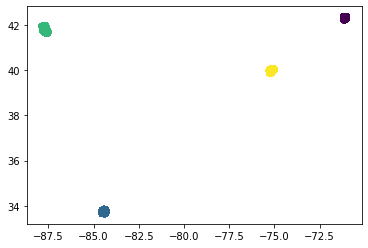

In [8]:
# show cluseters -- 4 different cities
plt.scatter(train.Longitude, train.Latitude, c= train.geo_cluster)

We have much more intersection data for city 2 and 3, less for city 0 and 1

In [9]:
print("number of data for each city: ",train.groupby("geo_cluster")["IntersectionId"].aggregate("count"))
print("number of unique intersection for each city: ",train.groupby("geo_cluster")["IntersectionId"].aggregate(lambda x: len(x.unique())))

number of data for each city:  geo_cluster
0    182050
1    153363
2    133674
3    388322
Name: IntersectionId, dtype: int64
number of unique intersection for each city:  geo_cluster
0     973
1     377
2    2129
3    1317
Name: IntersectionId, dtype: int64


## clusters within the city

can we try to cluster the intersections within the same city?

* looks like this is hard to determine the number of clusters we should use. But we can try different number of clusters later
* future use of this feature: this feature might be helpful to determine the potential traffic of other unseen intersections based on their cluster of the streets. (Alternatively, we can use k-nearest-neighbors for predictions of unseen intersections)

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


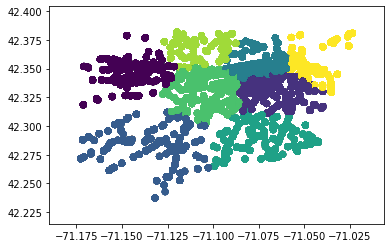

In [10]:
city0 = train[train["geo_cluster"] == 0]
geo_info_city0 = city0[["Longitude", "Latitude"]]
kmeans_city0  = KMeans(n_clusters=8).fit(geo_info_city0)
city0["street_cluster"] = kmeans_city0.labels_
plt.scatter(city0.Longitude, city0.Latitude, c = city0["street_cluster"])
#plt.title = "city 0 streets clusters"

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


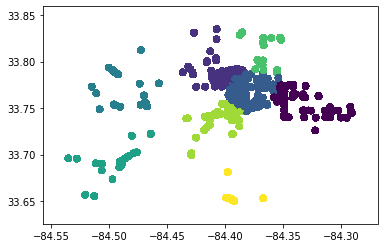

In [11]:
city1 = train[train["geo_cluster"] == 1]
geo_info_city1 = city1[["Longitude", "Latitude"]]
kmeans_city1  = KMeans(n_clusters=8).fit(geo_info_city1)
city1["street_cluster"] = kmeans_city1.labels_
plt.scatter(city1.Longitude, city1.Latitude, c = city1["street_cluster"])

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


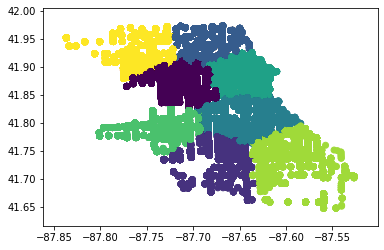

In [12]:
city2 = train[train["geo_cluster"] == 2]
geo_info_city2 = city2[["Longitude", "Latitude"]]
kmeans_city2 = KMeans(n_clusters=8).fit(geo_info_city2)
city2["street_cluster"] = kmeans_city2.labels_
plt.scatter(city2.Longitude, city2.Latitude, c = city2["street_cluster"])

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


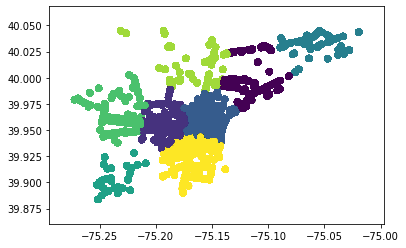

In [13]:
city3= train[train["geo_cluster"] == 3]
geo_info_city3 = city3[["Longitude", "Latitude"]]
kmeans_city3 = KMeans(n_clusters=8).fit(geo_info_city3)
city3["street_cluster"] = kmeans_city3.labels_
plt.scatter(city3.Longitude, city3.Latitude, c = city3["street_cluster"])

## Hours to traffic
For each city, let's look at the average total waiting time (50th percentile) by hours

city 0 at hour 0


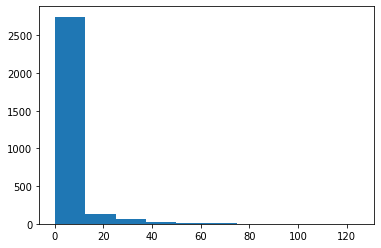

city 0 at hour 1


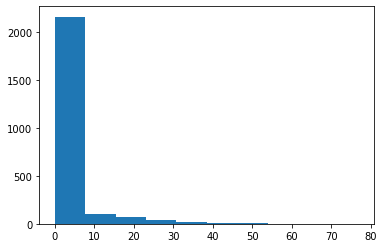

city 0 at hour 2


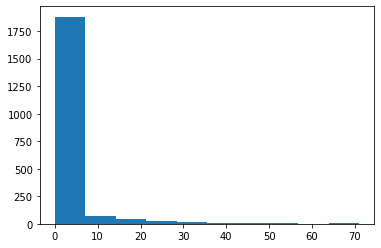

city 0 at hour 3


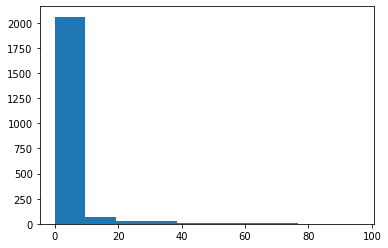

city 0 at hour 4


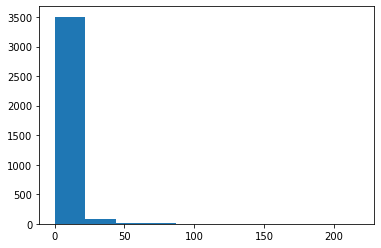

city 0 at hour 5


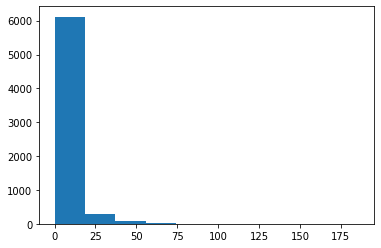

city 0 at hour 6


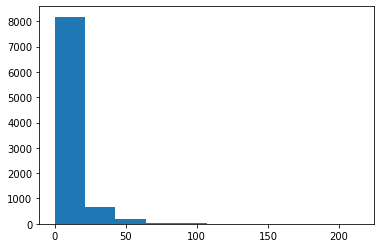

city 0 at hour 7


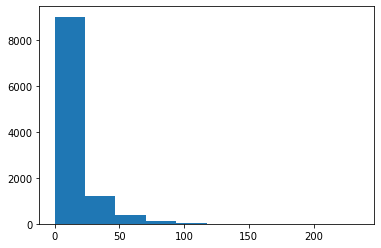

city 0 at hour 8


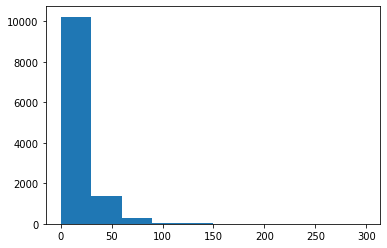

city 0 at hour 9


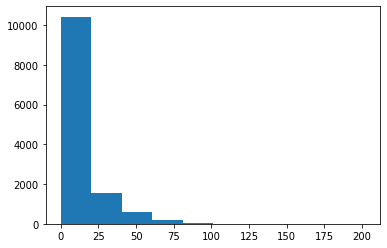

city 0 at hour 10


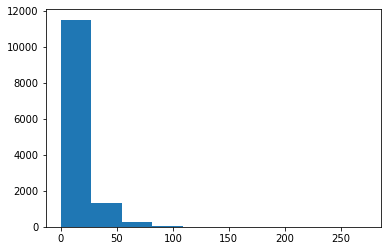

city 0 at hour 11


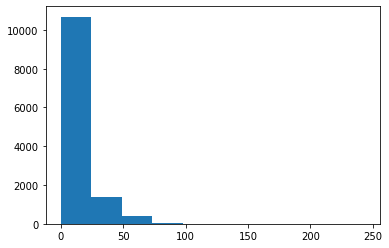

city 0 at hour 12


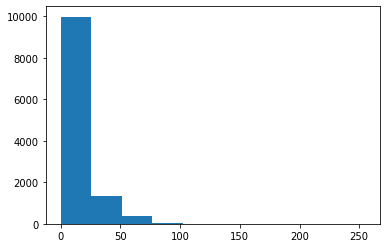

city 0 at hour 13


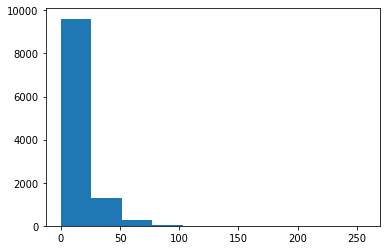

city 0 at hour 14


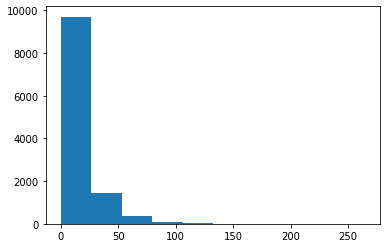

city 0 at hour 15


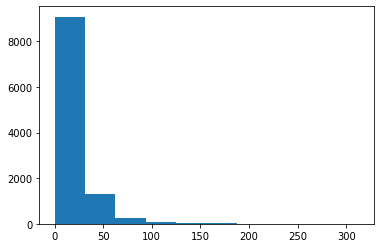

city 0 at hour 16


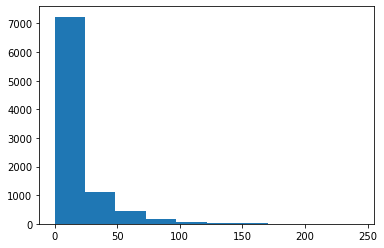

city 0 at hour 17


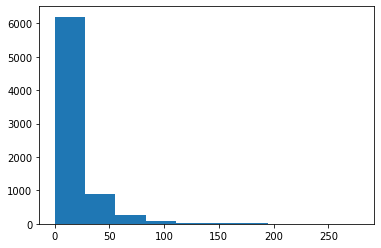

city 0 at hour 18


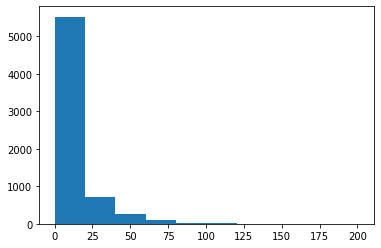

city 0 at hour 19


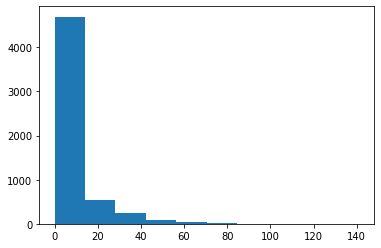

city 0 at hour 20


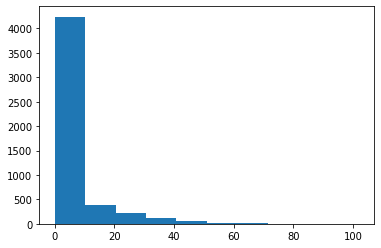

city 0 at hour 21


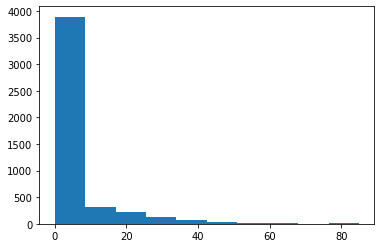

city 0 at hour 22


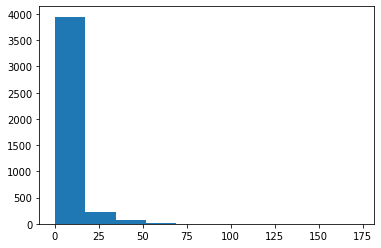

city 0 at hour 23


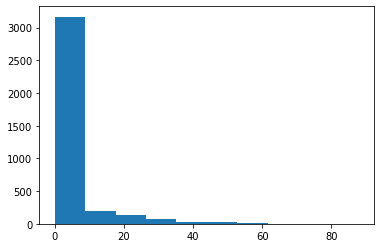

In [14]:
for i in range(24):
    wait_times_0 = train[(train["geo_cluster"] == 0) & (train["Hour"] == i)]["TotalTimeStopped_p50"]
    plt.hist(wait_times_0)
    print('city 0 at hour '+str(i))
    plt.show()

It seems like even with the separation of time, the data is highly unbalanced. So let's try to find the busy street first. By busy, for now we define it as TotalTimeStopped_p20 > 5 and TotalTimeStopped_p50 > 10. 

In [15]:
# helper function for easy visualization later
def busy_streets(city, features_req):
    busy_city = train[(train.geo_cluster == city)]
    for k, v in features_req.items():
        busy_city = busy_city[busy_city[k] > v]
    #print(busy_city.shape)
    print("number of unique busy intercestions in city {} : {}".format(city, len(busy_city.IntersectionId.unique())))
    return busy_city

def busy_streets_by_hour(city, features_req):
    busy_city=busy_streets(city, features_req)
    ls = (busy_city.groupby("Hour")["IntersectionId"].aggregate(lambda ls: len(ls.unique())))
    #print(ls)
    plt.plot(ls, label = "city "+str(city))
    return ls

Separated by hour, how many (unique) intersections are busy?

- suprisingly, even in the mid-night we see streets that are busy

number of unique busy intercestions in city 0 : 679
number of unique busy intercestions in city 0 : 679
number of unique busy intercestions in city 1 : 323
number of unique busy intercestions in city 1 : 323
number of unique busy intercestions in city 2 : 1198
number of unique busy intercestions in city 2 : 1198
number of unique busy intercestions in city 3 : 971
number of unique busy intercestions in city 3 : 971


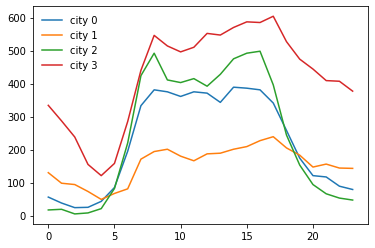

In [16]:
req = {"TotalTimeStopped_p20":5, "TotalTimeStopped_p50":10}
for city in range(4):
    busy_streets(city, req)
    streets = busy_streets_by_hour(city, req)
plt.legend(loc='upper left', frameon=False)

Now we are seeing some differences in cities! City 3 is clearly the busiest at all time. This also corresponds to our observation that we have much more intersection data for city 3 and 2 than city 0 and 1.

Try a more strict definition of "busy", this time we restrict it to be have at least 30 minutes waiting time on average (total wait time 50th percentile > 30)
   - Some interesting observations from the following data and chart:
       - even though for city 0 we only have 973 unique intersections in our data, we see in its peak time, about 1/3 of its intersections are busy. And for city 1 we only have 377, at its peak time about half of them are busy
       - now that we have a stricter definition of 'busy', the number of busy streets are actually getting closer to each other despite the number of total intersections in that city

number of unique busy intercestions in city 0 : 569
number of unique busy intercestions in city 0 : 569
number of unique busy intercestions in city 1 : 291
number of unique busy intercestions in city 1 : 291
number of unique busy intercestions in city 2 : 692
number of unique busy intercestions in city 2 : 692
number of unique busy intercestions in city 3 : 694
number of unique busy intercestions in city 3 : 694


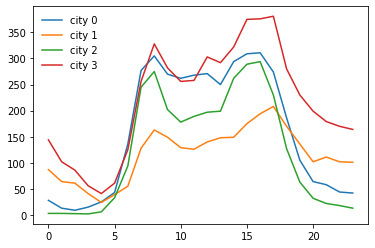

In [17]:
req = {"TotalTimeStopped_p20":5, "TotalTimeStopped_p50":30}
for city in range(4):
    busy_streets(city, req)
    streets = busy_streets_by_hour(city, req)
plt.legend(loc='upper left', frameon=False)

## time from first stop, distance from first stop, total stop time
in this part, we try to understand the relationship between time from first stop, distance from first stop, and our total stop time
* first let's look at the correlation matrix
* the time from first stop is almost perfectly correlated to the total stop time
* the distance from first stop is has a correlation coefficient of ~0.6, which indicates strong correlation as well
* the number of entry street is almost perfectly correlated to number of exits streets, that's not surprising

In [18]:
corr = train.iloc[:,11:-1].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,count_entry_streets,count_exit_streets
TotalTimeStopped_p20,1,0.78,0.71,0.64,0.54,0.94,0.72,0.66,0.6,0.52,0.67,0.46,0.4,0.35,0.27,0.03,0.031
TotalTimeStopped_p40,0.78,1,0.94,0.86,0.73,0.78,0.94,0.87,0.8,0.7,0.57,0.59,0.52,0.45,0.36,0.052,0.053
TotalTimeStopped_p50,0.71,0.94,1,0.92,0.8,0.71,0.9,0.94,0.86,0.75,0.53,0.57,0.56,0.48,0.39,0.06,0.061
TotalTimeStopped_p60,0.64,0.86,0.92,1,0.87,0.64,0.84,0.89,0.93,0.81,0.48,0.54,0.54,0.51,0.41,0.068,0.068
TotalTimeStopped_p80,0.54,0.73,0.8,0.87,1,0.54,0.72,0.78,0.84,0.91,0.41,0.47,0.48,0.47,0.44,0.082,0.081
TimeFromFirstStop_p20,0.94,0.78,0.71,0.64,0.54,1,0.77,0.7,0.64,0.56,0.82,0.58,0.51,0.45,0.35,0.031,0.032
TimeFromFirstStop_p40,0.72,0.94,0.9,0.84,0.72,0.77,1,0.93,0.85,0.75,0.65,0.78,0.7,0.62,0.5,0.048,0.05
TimeFromFirstStop_p50,0.66,0.87,0.94,0.89,0.78,0.7,0.93,1,0.92,0.8,0.59,0.73,0.76,0.68,0.55,0.055,0.056
TimeFromFirstStop_p60,0.6,0.8,0.86,0.93,0.84,0.64,0.85,0.92,1,0.88,0.54,0.68,0.72,0.74,0.62,0.059,0.061
TimeFromFirstStop_p80,0.52,0.7,0.75,0.81,0.91,0.56,0.75,0.8,0.88,1,0.46,0.59,0.63,0.67,0.71,0.068,0.07


### Visualize the busy intersections on Map

In [19]:
train.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [20]:
train.iloc[0,:]

RowId                                                                1920335
IntersectionId                                                             0
Latitude                                                             33.7917
Longitude                                                             -84.43
EntryStreetName                                 Marietta Boulevard Northwest
ExitStreetName                                  Marietta Boulevard Northwest
EntryHeading                                                              NW
ExitHeading                                                               NW
Hour                                                                       0
Weekend                                                                    0
Month                                                                      6
Path                       Marietta Boulevard Northwest_NW_Marietta Boule...
TotalTimeStopped_p20                                                       0

In [21]:
# plot 24 hour non-zero avg stop times of a city
def plot_24_hours(city_name, least_avg_stop_time = 0):
    city = train[train.City == city_name]
    for i in range(24):
        df = city[(city["Hour"] == i) & (city["TotalTimeStopped_p50"] > least_avg_stop_time)]
        geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
        gdf= gpd.GeoDataFrame(df, geometry=geometry)
        print(city_name + " hour "+str(i))
        gdf.plot(column = "TotalTimeStopped_p50", legend=True)
        plt.show()

Atlanta hour 0


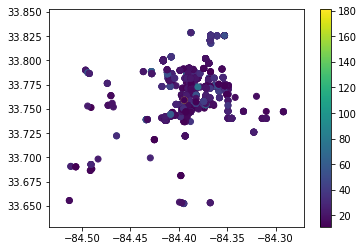

Atlanta hour 1


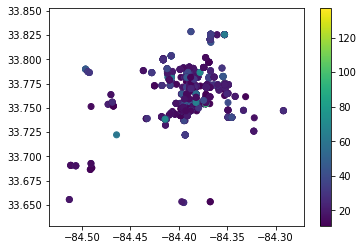

Atlanta hour 2


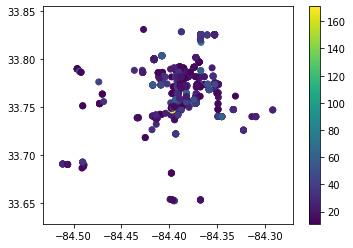

Atlanta hour 3


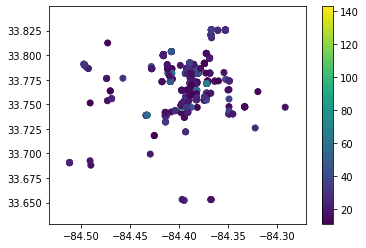

Atlanta hour 4


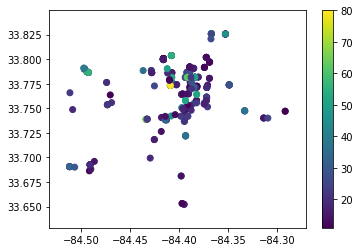

Atlanta hour 5


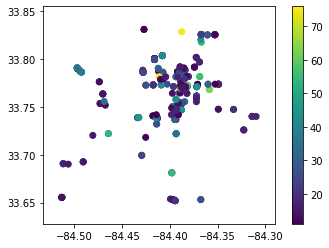

Atlanta hour 6


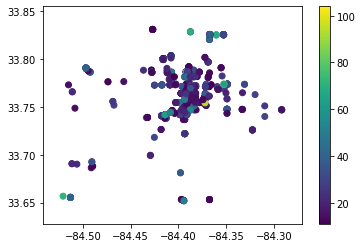

Atlanta hour 7


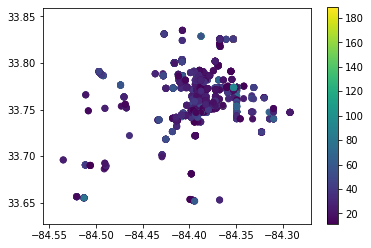

Atlanta hour 8


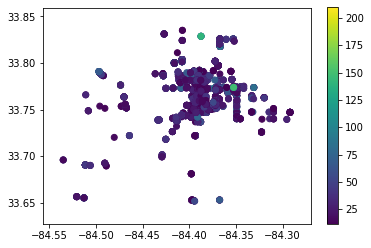

Atlanta hour 9


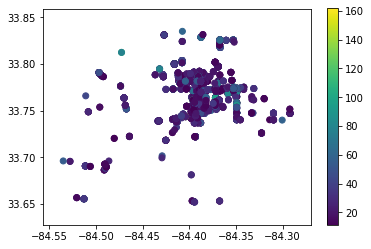

Atlanta hour 10


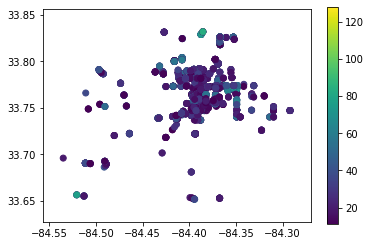

Atlanta hour 11


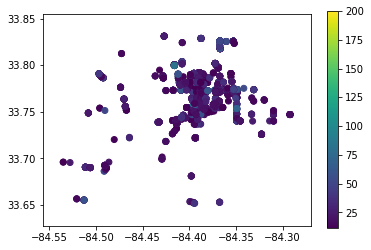

Atlanta hour 12


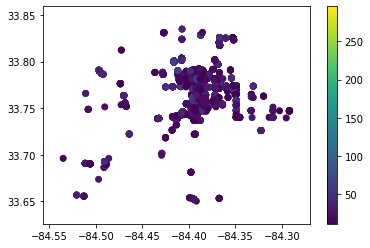

Atlanta hour 13


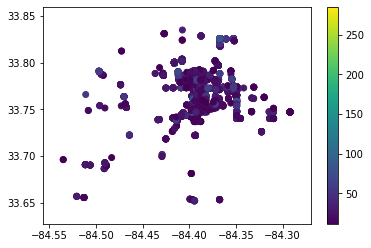

Atlanta hour 14


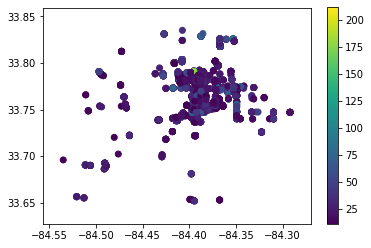

Atlanta hour 15


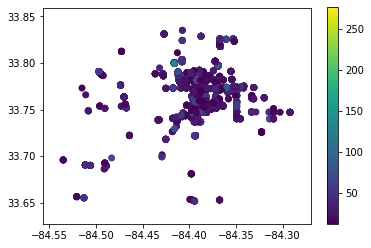

Atlanta hour 16


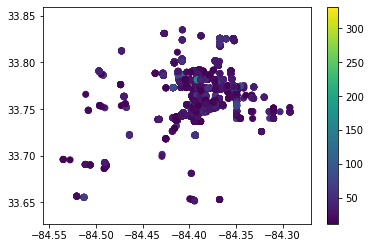

Atlanta hour 17


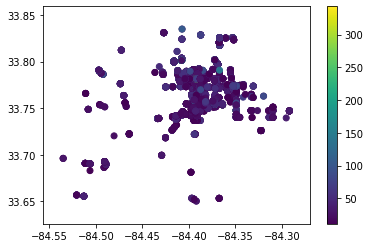

Atlanta hour 18


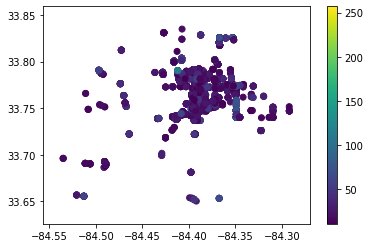

Atlanta hour 19


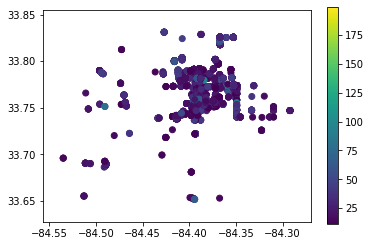

Atlanta hour 20


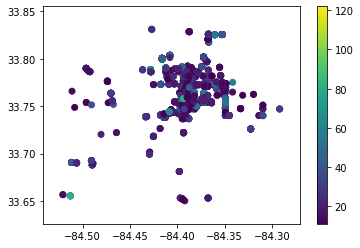

Atlanta hour 21


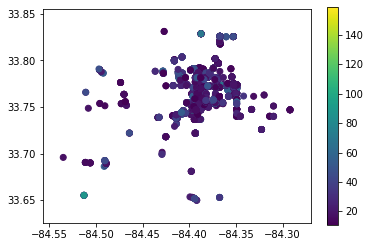

Atlanta hour 22


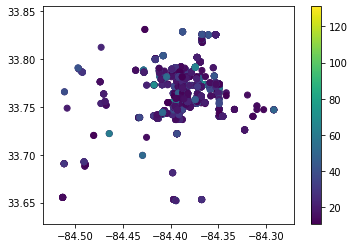

Atlanta hour 23


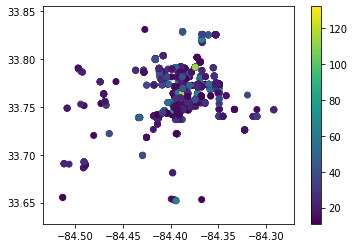

In [22]:
plot_24_hours("Atlanta", 10) # plot intersections that have at least 10mins avg total wait time

# Part 2: searching for models

tried baseline for:
* Linear Regression
* KNN
* Gradient Boosting

more ...?

In [90]:
train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'count_entry_streets', 'count_exit_streets', 'geo_cluster',
       'EntryHeadingNS', 'EntryHeadingWE', 'ExitHeadingNS', 'ExitHeadingWE'],
      dtype='object')

In [92]:
cols = ["IntersectionId", "Latitude", "Longitude", "geo_cluster", "Hour", "Weekend", "Month", 
        "count_entry_streets", "count_exit_streets", 'EntryHeadingNS', 'EntryHeadingWE', 
        'ExitHeadingNS', 'ExitHeadingWE']
cols2 = ["IntersectionId", "Latitude", "Longitude","Hour"]
X = train[cols]
y = train["TotalTimeStopped_p50"]

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)

Linear Regression

In [136]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg_y_pred = reg.predict(X_valid)
print("mean squared error :",mean_squared_error(y_valid, reg_y_pred))
print("mean absolute error :",mean_absolute_error(y_valid, reg_y_pred))
print("max error :",max_error(y_valid, reg_y_pred))

mean squared error : 236.80452059695816
mean absolute error : 10.413991214061905
max error : 272.92729660520996


KNN

In [134]:
# fit KNN
knn_classifiers = []
for weights in ["uniform", "distance"]:
    for n_neighbors in range(4, 9):
        classifier = KNeighborsRegressor(n_neighbors=n_neighbors, weights = weights)
        classifier.fit(X_train, y_train)
        knn_classifiers.append(classifier)
        # pred
        y_pred = classifier.predict(X_valid)
        print("K = {}, weights = {}".format(n_neighbors, weights))
        print("mean squared error :",mean_squared_error(y_valid, y_pred))
        print("mean absolute error :",mean_absolute_error(y_valid, y_pred))
        print("max error :",max_error(y_valid, y_pred))

K = 4, weights = uniform
mean squared error : 144.41248717066514
mean absolute error : 6.45171796456771
max error : 251.0
K = 5, weights = uniform
mean squared error : 143.53438191763564
mean absolute error : 6.554826745664268
max error : 251.0
K = 6, weights = uniform
mean squared error : 143.1463026893655
mean absolute error : 6.6550327925574315
max error : 248.83333333333334
K = 7, weights = uniform
mean squared error : 143.33447396989845
mean absolute error : 6.748942412947963
max error : 249.14285714285714
K = 8, weights = uniform
mean squared error : 143.91135603882623
mean absolute error : 6.843955925403249
max error : 249.375
K = 4, weights = distance
mean squared error : 158.61067237849792
mean absolute error : 6.5741733937424165
max error : 251.0
K = 5, weights = distance
mean squared error : 158.22023901188163
mean absolute error : 6.663729301122975
max error : 251.0
K = 6, weights = distance
mean squared error : 158.27698304749896
mean absolute error : 6.75303978576965
max 

In [143]:
knn_classifiers[0].score(X_valid, y_valid)

0.40071824270461576

Gradient Boosting

In [139]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                          max_depth=3, random_state=0, loss='ls').fit(X_train, y_train)
gbr_y_pred = gbr.predict(X_valid)

In [140]:
print("mean squared error :",mean_squared_error(y_valid, gbr_y_pred))
print("mean absolute error :",mean_absolute_error(y_valid, gbr_y_pred))
print("max error :",max_error(y_valid, gbr_y_pred))

mean squared error : 214.262896571783
mean absolute error : 9.732641724207502
max error : 269.35576287480353


In [146]:
for col, i in zip(cols, gbr.feature_importances_):
    print("{} : {}".format(col, i))

IntersectionId : 0.047006089603245725
Latitude : 0.18154155097791222
Longitude : 0.14904227943871082
geo_cluster : 0.028011864794647477
Hour : 0.24673988760169385
Weekend : 0.07631156828497129
Month : 0.001855856237717778
count_entry_streets : 0.05490531192864086
count_exit_streets : 0.019709964699190997
EntryHeadingNS : 0.0826166920127071
EntryHeadingWE : 0.03340197186263621
ExitHeadingNS : 0.06077069616051272
ExitHeadingWE : 0.018086266397412967
